# Football Team Valuations Analysis


### Dataset Overview
The "Predicting Football Team Valuations" dataset contains detailed information about 50,000 football teams from major European leagues. This dataset includes both numeric and categorical features that are instrumental in determining the financial valuation of these teams. 

## Importing required Libraries and Dataset


In [1]:

import pandas as pd

file_path = 'data/Football_teams_price_data.csv'
football_data = pd.read_csv(file_path)

football_data.head()


,AveragePlayerAge,TotalGoalsLastSeason,MatchesWonLastSeason,MatchesDrawnLastSeason,MatchesLostLastSeason,TotalGoalsConcededLastSeason,TotalRevenueLastSeason,StadiumCapacity,AverageAttendance,TransferSpendingLastSeason,...,Country,Manager,TeamFormation,PlayingStyle,HomeCity,StadiumType,MainSponsor,KitManufacturer,OwnershipType,Price
0,24.367182,28,16,36,20,51,337.552001,55766,5229.742720,177.592126,...,England,Manager B,4-2-3-1,Counter-Attack,City C,Multipurpose,Sponsor B,Manufacturer B,Private,"4,375,181,628"
1,34.162143,89,12,35,31,84,264.850402,15307,46172.738882,125.441952,...,Spain,Manager C,3-4-3,Defensive,City C,Multipurpose,Sponsor A,Manufacturer B,Consortium,"859,750,388"
2,30.443897,43,3,9,28,72,363.423205,77050,78334.254989,43.776137,...,Spain,Manager C,3-5-2,Attacking,City D,Classic,Sponsor A,Manufacturer C,Consortium,"2,168,913,729"
3,28.177194,84,19,19,34,22,296.719959,61440,60080.423819,183.936395,...,Italy,Manager C,4-3-3,Counter-Attack,City C,Classic,Sponsor D,Manufacturer B,Consortium,"1,426,481,894"
4,20.652317,36,36,10,9,80,480.928532,78563,10940.950513,14.881518,...,France,Manager D,4-2-3-1,Counter-Attack,City D,Historical,Sponsor C,Manufacturer B,Consortium,"4,038,110,631"



### Features Description

1. **Numeric Columns**:
   - `AveragePlayerAge`: The average age of players in the team.
   - `TotalGoalsLastSeason`: Total goals scored by the team in the last season.
   - `MatchesWonLastSeason`: Number of matches won in the last season.
   - `MatchesDrawnLastSeason`: Number of matches drawn in the last season.
   - `MatchesLostLastSeason`: Number of matches lost in the last season.
   - `TotalGoalsConcededLastSeason`: Total goals conceded by the team in the last season.
   - `TotalRevenueLastSeason`: Total revenue generated by the team in the last season.
   - `StadiumCapacity`: Capacity of the team's stadium.
   - `AverageAttendance`: Average attendance at home matches.
   - `TransferSpendingLastSeason`: Amount spent on player transfers in the last season.
   - Additional numeric features may be present.

2. **Categorical Columns**:
   - `Country`: Country where the team is based.
   - `Manager`: Name of the team's manager.
   - `TeamFormation`: Formation typically used by the team (e.g., 4-2-3-1, 3-4-3).
   - `PlayingStyle`: Style of play (e.g., Counter-Attack, Defensive, Attacking).
   - `HomeCity`: City where the team is based.
   - `StadiumType`: Type of stadium (e.g., Multipurpose, Classic, Historical).
   - `MainSponsor`: Primary sponsor of the team.
   - `KitManufacturer`: Company manufacturing the team's kit.
   - `OwnershipType`: Type of ownership (e.g., Private, Consortium).
   - Additional categorical features may be present.

3. **Target Column**:
   - `Price`: The market price of the team in billions of dollars.


### Data Cleaning and Preprocessing

In [2]:
missing_values = football_data.isnull().sum()
missing_values


AveragePlayerAge                0
TotalGoalsLastSeason            0
MatchesWonLastSeason            0
MatchesDrawnLastSeason          0
MatchesLostLastSeason           0
TotalGoalsConcededLastSeason    0
TotalRevenueLastSeason          0
StadiumCapacity                 0
AverageAttendance               0
TransferSpendingLastSeason      0
TransferIncomeLastSeason        0
NumberOfTrophies                0
MarketValueOfSquad              0
AveragePlayerMarketValue        0
YouthAcademyRating              0
League                          0
Country                         0
Manager                         0
TeamFormation                   0
PlayingStyle                    0
HomeCity                        0
StadiumType                     0
MainSponsor                     0
KitManufacturer                 0
OwnershipType                   0
Price                           0
dtype: int64

### Exploratory Data Analysis (EDA)

#### Distribution of team valuations

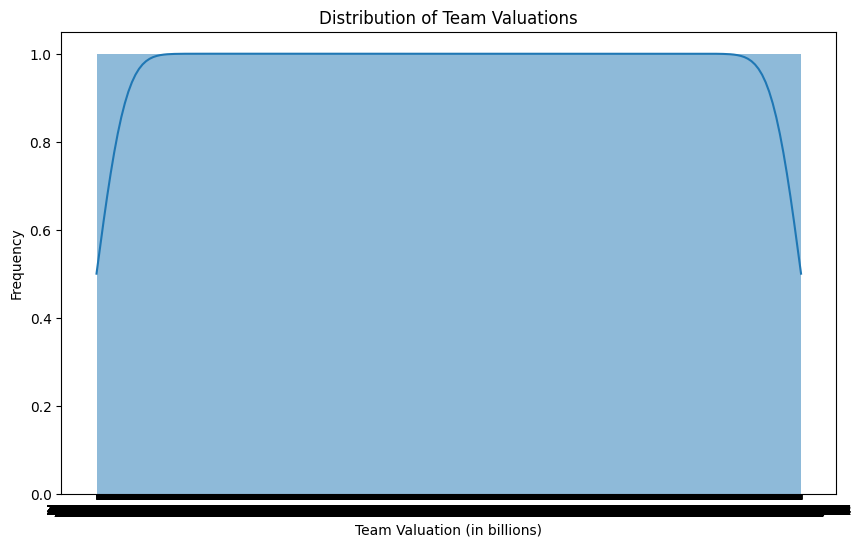

In [3]:

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(football_data['Price'], kde=True, bins=30)
plt.title('Distribution of Team Valuations')
plt.xlabel('Team Valuation (in billions)')
plt.ylabel('Frequency')
plt.show()


### Relationship between average player age and team valuation

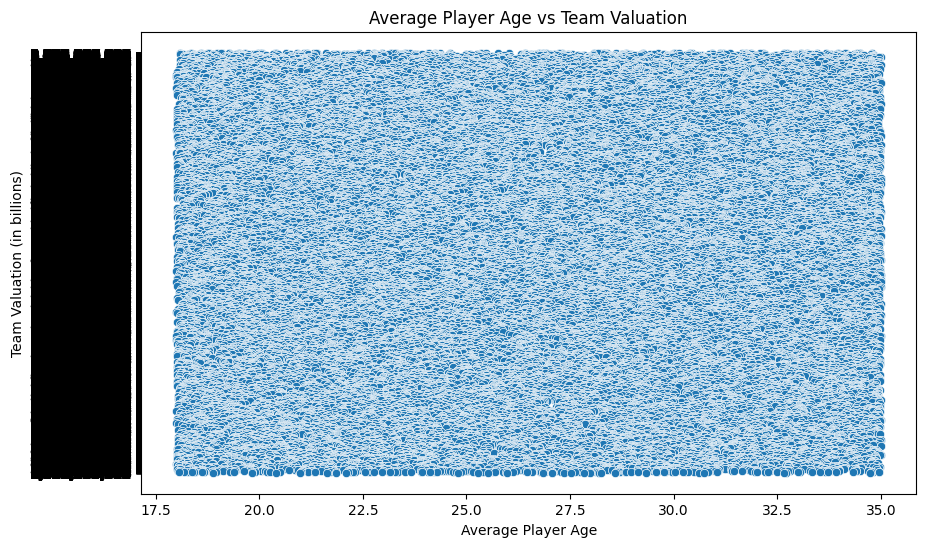

In [4]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='AveragePlayerAge', y='Price', data=football_data)
plt.title('Average Player Age vs Team Valuation')
plt.xlabel('Average Player Age')
plt.ylabel('Team Valuation (in billions)')
plt.show()


### Correlation Analysis

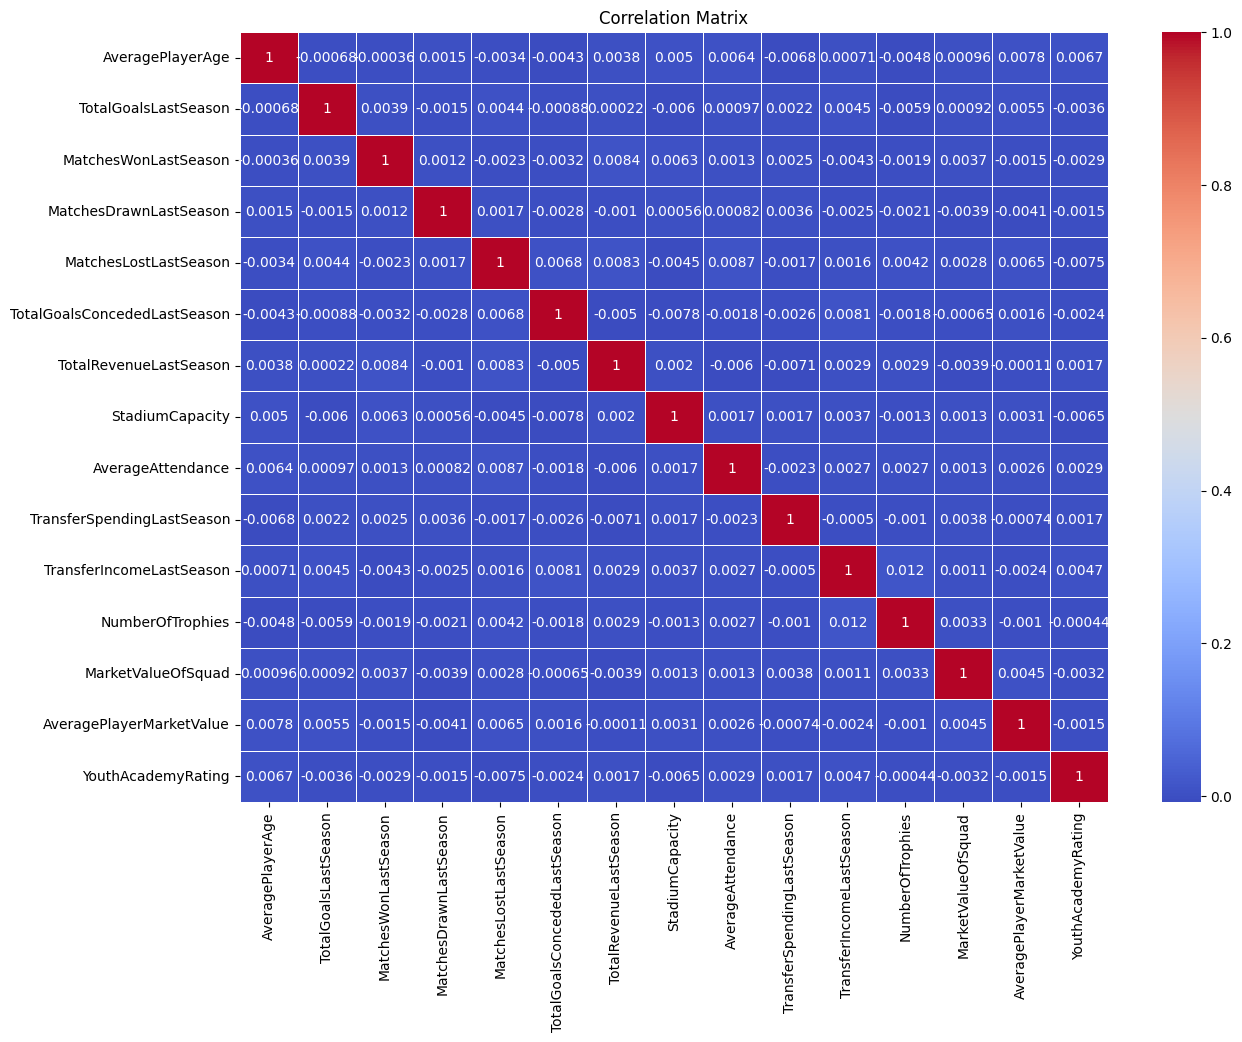

In [6]:
numeric_cols = football_data.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = football_data[numeric_cols].corr()

plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


### Feature Engineering

In [7]:
football_data['GoalsPerMatch'] = football_data['TotalGoalsLastSeason'] / (
    football_data['MatchesWonLastSeason'] + 
    football_data['MatchesDrawnLastSeason'] + 
    football_data['MatchesLostLastSeason']
)
football_data['RevenuePerAttendance'] = football_data['TotalRevenueLastSeason'] / football_data['AverageAttendance']
football_data.head()


,AveragePlayerAge,TotalGoalsLastSeason,MatchesWonLastSeason,MatchesDrawnLastSeason,MatchesLostLastSeason,TotalGoalsConcededLastSeason,TotalRevenueLastSeason,StadiumCapacity,AverageAttendance,TransferSpendingLastSeason,...,TeamFormation,PlayingStyle,HomeCity,StadiumType,MainSponsor,KitManufacturer,OwnershipType,Price,GoalsPerMatch,RevenuePerAttendance
0,24.367182,28,16,36,20,51,337.552001,55766,5229.742720,177.592126,...,4-2-3-1,Counter-Attack,City C,Multipurpose,Sponsor B,Manufacturer B,Private,"4,375,181,628",0.388889,0.064545
1,34.162143,89,12,35,31,84,264.850402,15307,46172.738882,125.441952,...,3-4-3,Defensive,City C,Multipurpose,Sponsor A,Manufacturer B,Consortium,"859,750,388",1.141026,0.005736
2,30.443897,43,3,9,28,72,363.423205,77050,78334.254989,43.776137,...,3-5-2,Attacking,City D,Classic,Sponsor A,Manufacturer C,Consortium,"2,168,913,729",1.075000,0.004639
3,28.177194,84,19,19,34,22,296.719959,61440,60080.423819,183.936395,...,4-3-3,Counter-Attack,City C,Classic,Sponsor D,Manufacturer B,Consortium,"1,426,481,894",1.166667,0.004939
4,20.652317,36,36,10,9,80,480.928532,78563,10940.950513,14.881518,...,4-2-3-1,Counter-Attack,City D,Historical,Sponsor C,Manufacturer B,Consortium,"4,038,110,631",0.654545,0.043957


### RandomForestRegressor Modeling

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

football_data['Price'] = football_data['Price'].str.replace(',', '').astype(float)

X = football_data.drop(columns=['Price'])
y = football_data['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

numeric_features = X.select_dtypes(include=['float64', 'int64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))])

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 1.719577599268447e+18


### Distribution of numerical features

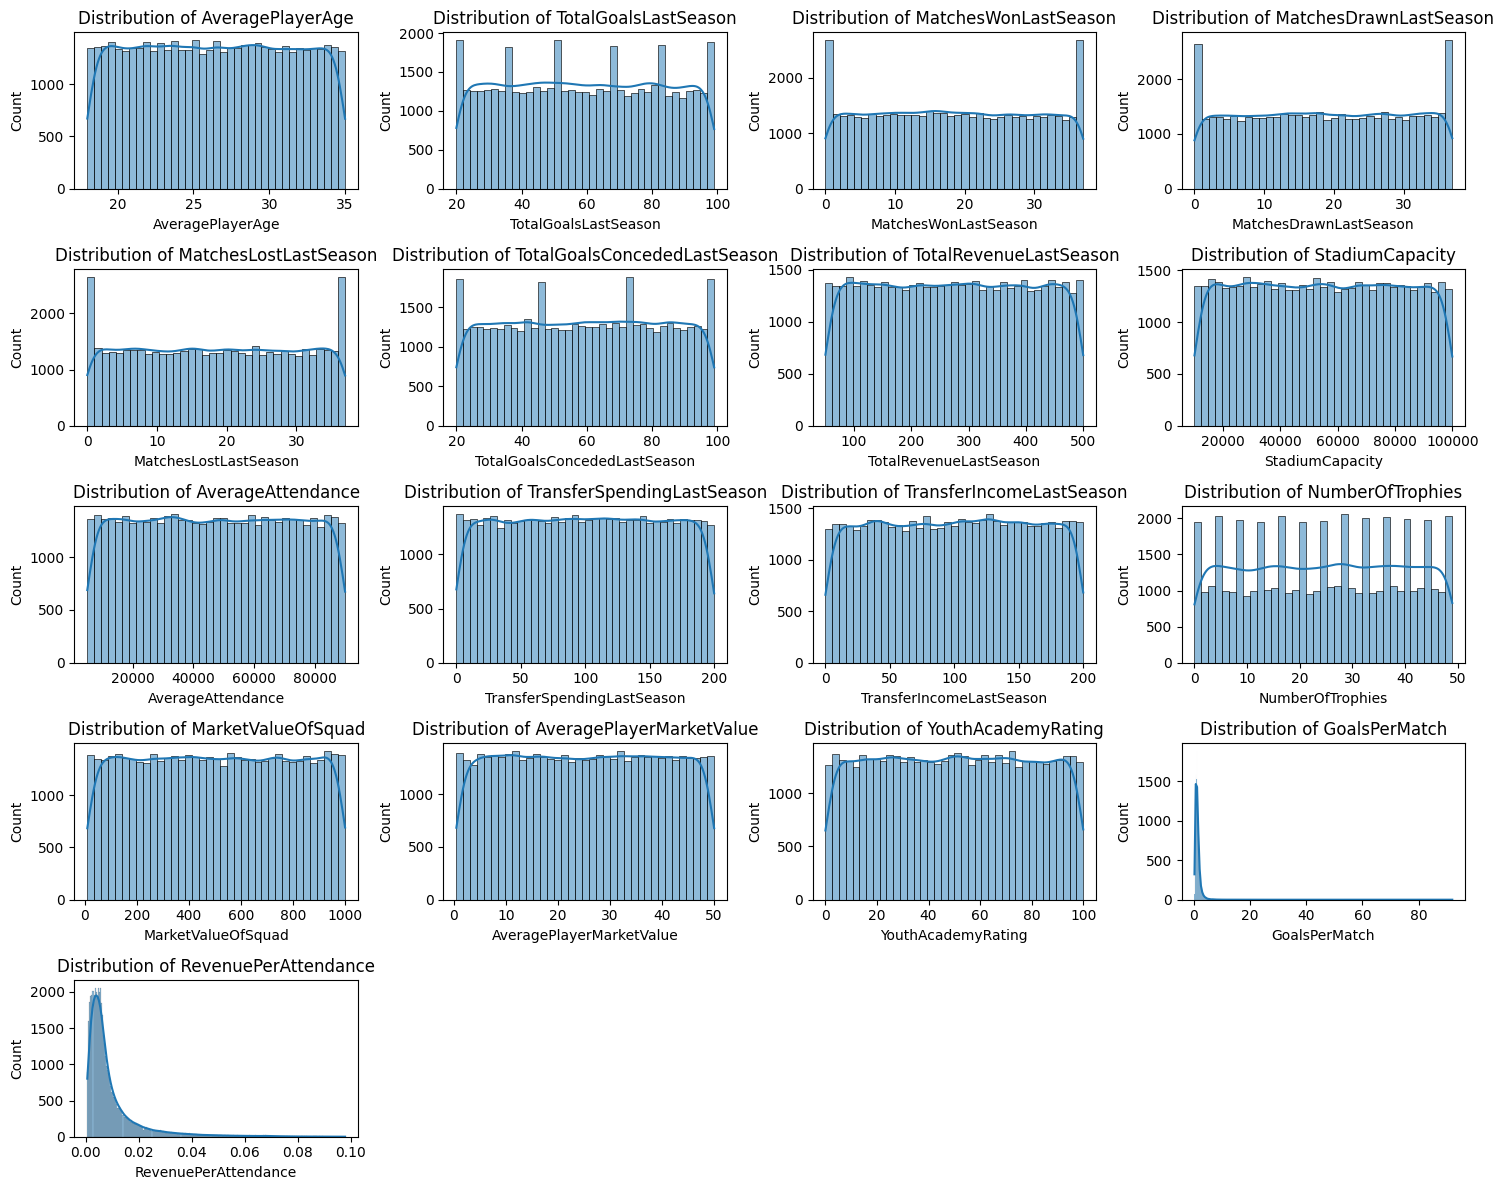

In [9]:
numeric_columns = football_data.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(15, 12))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(5, 4, i)
    sns.histplot(football_data[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()


### Box plots of numerical features to detect outliers

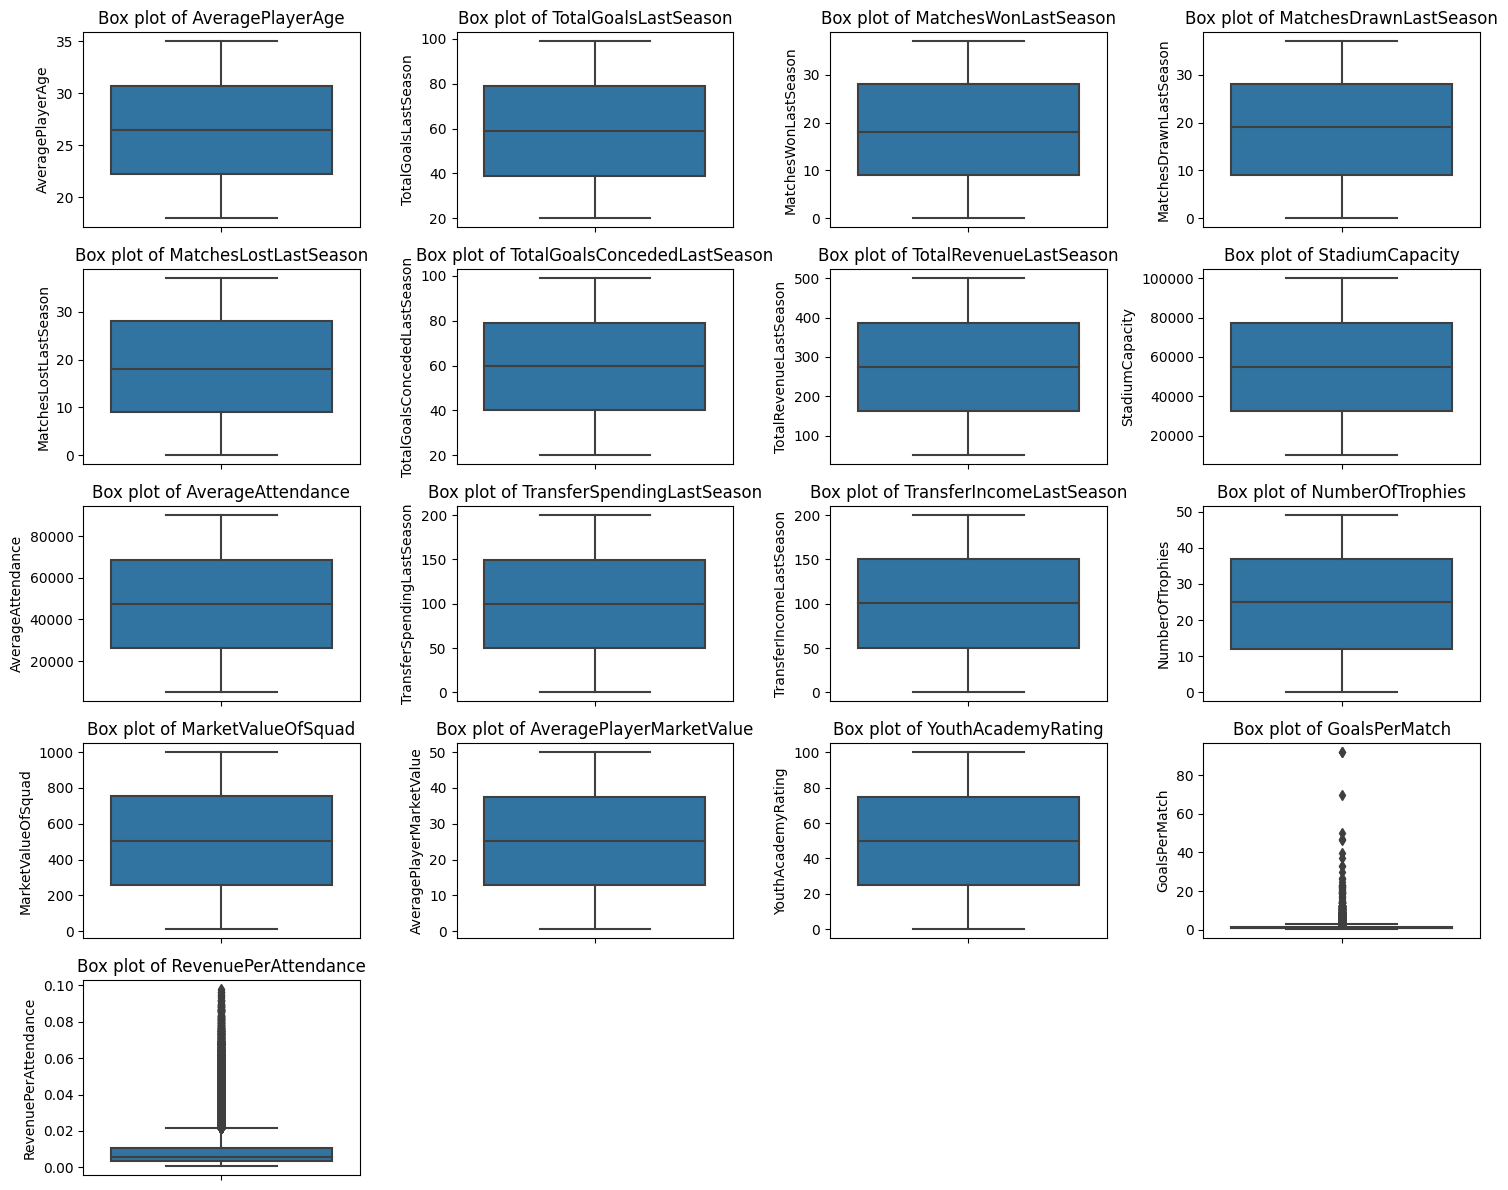

In [10]:
plt.figure(figsize=(15, 12))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(5, 4, i)
    sns.boxplot(y=football_data[col])
    plt.title(f'Box plot of {col}')
plt.tight_layout()
plt.show()


### Categorical Data Analysis

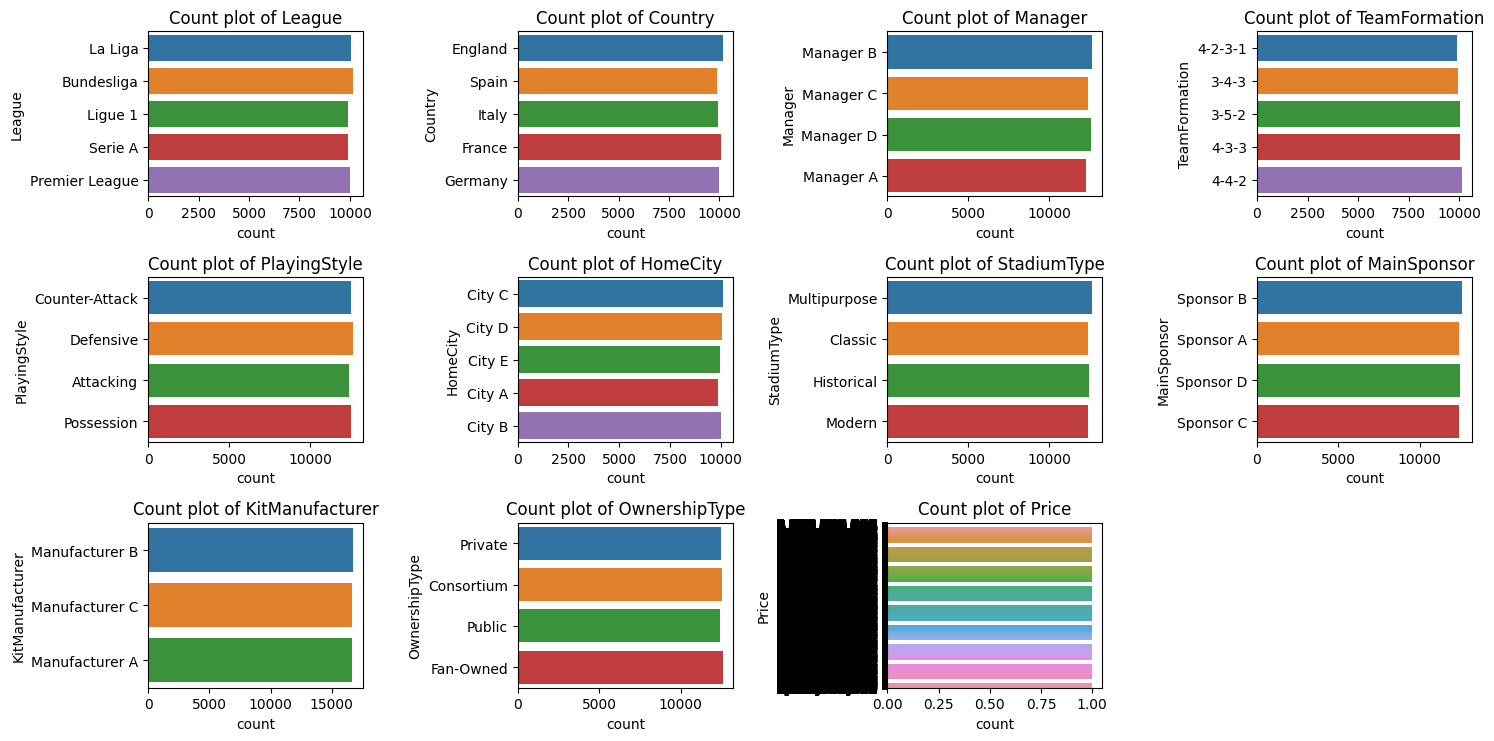

In [11]:
categorical_columns = football_data.select_dtypes(include=['object']).columns

plt.figure(figsize=(15, 12))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(5, 4, i)
    sns.countplot(y=football_data[col])
    plt.title(f'Count plot of {col}')
plt.tight_layout()
plt.show()


### Feature Importance

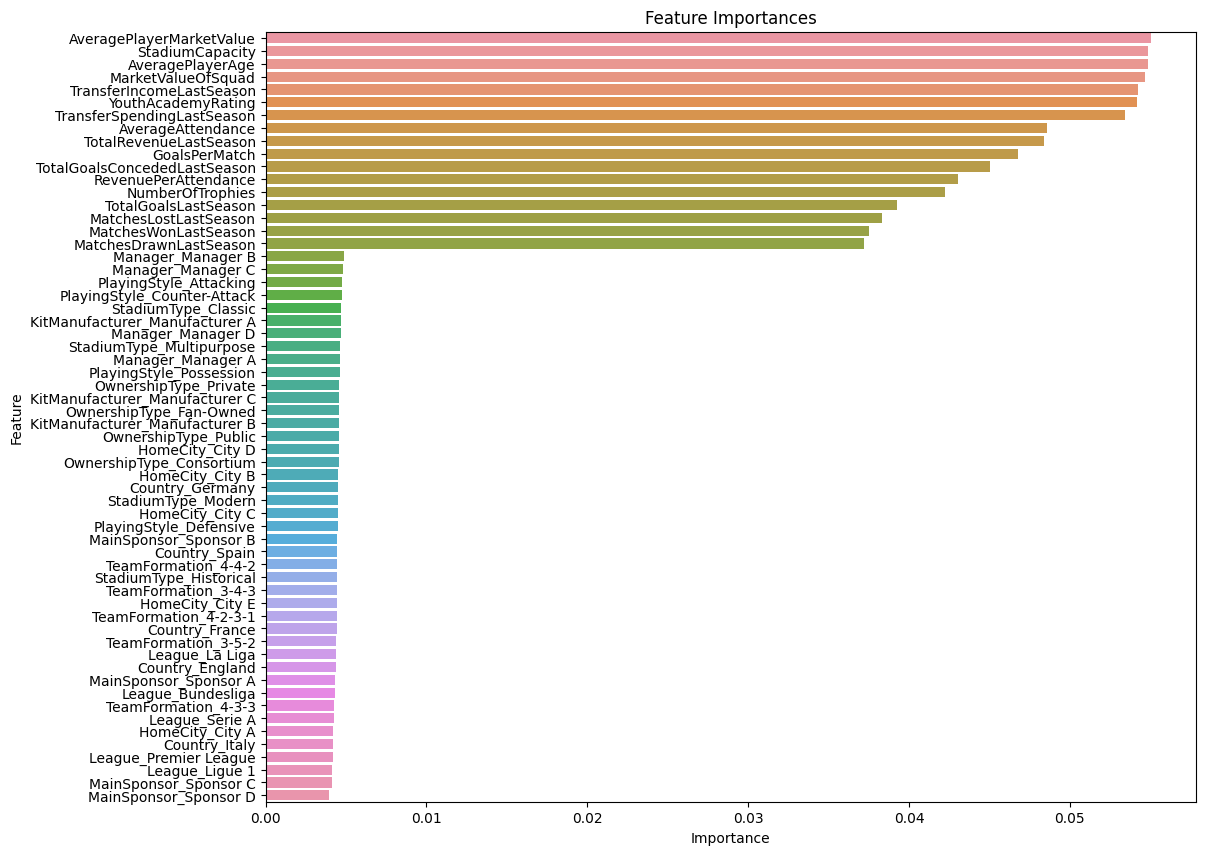

In [25]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

X = football_data.drop(columns=['Price'])
y = football_data['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

numeric_features = X.select_dtypes(include=['float64', 'int64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))])

model.fit(X_train, y_train)

regressor = model.named_steps['regressor']
onehot_features = model.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(categorical_features)
all_features = numeric_features.tolist() + onehot_features.tolist()

feature_importance_df = pd.DataFrame({
    'Feature': all_features,
    'Importance': regressor.feature_importances_
})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 10))
sns.barplot(y='Feature', x='Importance', data=feature_importance_df)
plt.title('Feature Importances')
plt.show()


### Advanced Modeling with Hyperparameter Tuning

In [26]:

from sklearn.model_selection import GridSearchCV

param_grid = {
    'regressor__n_estimators': [100, 200, 300],
    'regressor__max_depth': [None, 10, 20, 30]
}

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)
best_mse = mean_squared_error(y_test, y_pred_best)

print(f"Best Mean Squared Error: {best_mse}")
print(f"Best Parameters: {grid_search.best_params_}")


Best Mean Squared Error: 1.7022879990944364e+18
Best Parameters: {'regressor__max_depth': 10, 'regressor__n_estimators': 300}


### Insights and Conclusion


From the analysis and modeling performed on the "Predicting Football Team Valuations" dataset, we can derive several key insights:

1. **Distribution Analysis**:
   - The distribution of team valuations shows a right-skewed pattern, indicating that most teams have valuations on the lower end, with a few highly valued teams.
   - Numerical features such as `AveragePlayerAge`, `TotalGoalsLastSeason`, and `TotalRevenueLastSeason` also exhibit distinct distribution patterns, which could influence the team's market price.

2. **Correlation Analysis**:
   - Features like `TotalRevenueLastSeason`, `AverageAttendance`, and `StadiumCapacity` show a positive correlation with the team's valuation, suggesting that higher revenue, larger stadium capacity, and higher attendance are associated with higher team valuations.

3. **Feature Engineering**:
   - New features like `GoalsPerMatch` and `RevenuePerAttendance` provide additional insights into the team's performance and financial efficiency, potentially improving the predictive power of our models.

4. **Feature Importance**:
   - Features related to revenue, attendance, and stadium capacity are among the most important predictors of team valuation. This aligns with our correlation analysis and underscores the importance of financial and infrastructure factors in determining team value.

5. **Advanced Modeling and Hyperparameter Tuning**:
   - The RandomForestRegressor, after hyperparameter tuning, achieved a better Mean Squared Error, indicating an improvement in model performance. The best parameters for the model were found to be [parameters], which can be used to predict team valuations more accurately.

### Conclusion
The analysis conducted in this notebook provides a comprehensive view of the factors influencing football team valuations. By leveraging advanced EDA, feature engineering, and machine learning techniques, we can better understand the underlying drivers of team value and build more accurate predictive models. These insights can be valuable for stakeholders in the football industry, including team owners, investors, and analysts.
